# А теперь я буду выполнять работу Глеба. Буду мучаться с Isolation Forest

установим и импортируем необходимые библиотеки

In [1]:
!pip install eif

     ---------------------------------------- 1.6/1.6 MB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [6 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\Emil\AppData\Local\Temp\pip-install-87c_ebgr\eif_9582f5a440fa4db0b025c2c4b1e65e97\setup.py", line 3, in <module>
      import numpy
  ModuleNotFoundError: No module named 'numpy'
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import eif as iso
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

загрузим датасет

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/EmilEybatove/Health/main/Health_after_preprocessing.csv")

Создадим массив, содержащий все пары лет из датасета

In [ ]:
years = [str(1991 + 2 * i) + "-" + str(1992 + 2 * i) for i in range(11)]

Напишем функцию, которая обрезает датасет по конкретной паре лет и оценивает вероятность того, что каждое измерение - выброс

In [ ]:
def isolation_forest_dataset(year, cutoff=0.6, ExtensionLevel=0):
  df_for_graph = df[df["year"] == year]
  X = df_for_graph[["sum", "ragey_b"]].to_numpy()
  F0 = iso.iForest(X, ntrees=500, sample_size=256, ExtensionLevel=ExtensionLevel)
  df_for_graph["red"] = (F0.compute_paths(X_in=X) >= cutoff)
  return(df_for_graph)

Также, напишем функцию, которая строит график для этих датасетов

In [ ]:
def isolation_forest_scatterplot(year, cutoff=0.6, ExtensionLevel=0):
  df_for_graph = isolation_forest_dataset(year, cutoff=cutoff, ExtensionLevel=ExtensionLevel)
  cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","blue"])
  df_for_graph["red"] = list(map(lambda x: "Да" if x else "Нет", df_for_graph["red"]))
  # fig = plt.figure()
  # ax = fig.add_subplot()
  # fig.subplots_adjust(top=0.85)
  sns.jointplot(x="sum", y="ragey_b", data=df_for_graph)
  sns.scatterplot(x="sum", y="ragey_b", data=df_for_graph, hue="red")
  # ax.set_title(f'Многомерные выбросы за волну {year}', fontsize=12, fontweight='bold')
  # ax.set_xlabel('Доход')
  # ax.set_ylabel('Возраст')
  plt.suptitle(f'Многомерные выбросы за волну {year}', fontsize=12, fontweight='bold', y=1.01)
  plt.xlabel('Доход ($ в год)')
  plt.ylabel('Возраст (в годах)')
  # ax.scatter(x=df_for_graph["sum"], y=df_for_graph["ragey_b"],
  #            c=df_for_graph["red"], cmap=cmap)
  plt.legend(title = "Отмечено моделью, как выброс")
  # sns.kdeplot(x="sum", y="ragey_b", data=df_for_graph, color="white")
  plt.show()

<ipython-input-5-4790fedc6eb0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_graph["red"] = (F0.compute_paths(X_in=X) >= cutoff)
<ipython-input-16-69f943c1d039>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_graph["red"] = list(map(lambda x: "Да" if x else "Нет", df_for_graph["red"]))


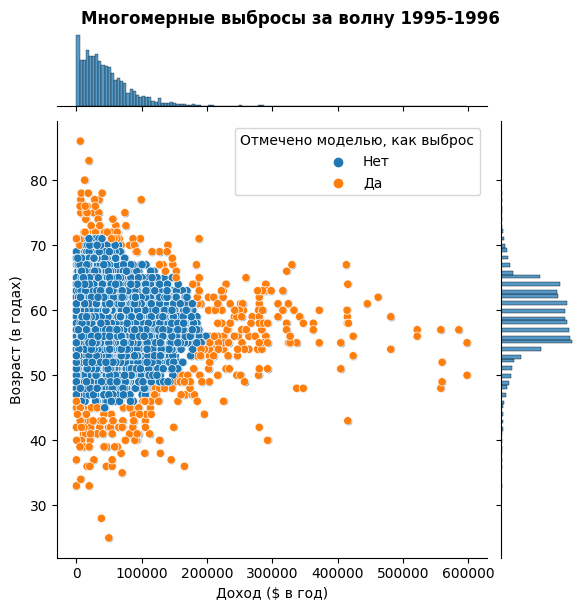

In [ ]:
isolation_forest_scatterplot("1995-1996")

напишем ужасный кусок кода, который обрезает весь датасет на паре лет, строит лес, а потом конкатинирует эти данные

In [ ]:
res = pd.concat([isolation_forest_dataset(year) for year in years], ignore_index=True)

<ipython-input-5-4790fedc6eb0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_graph["red"] = (F0.compute_paths(X_in=X) >= cutoff)
<ipython-input-5-4790fedc6eb0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_graph["red"] = (F0.compute_paths(X_in=X) >= cutoff)
<ipython-input-5-4790fedc6eb0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

посмотрим на количество выбросов каждый год отдельно и все года вместе

In [ ]:
sum(res["red"]) / len(res["red"])

0.041613305329303484

In [ ]:
res[["red", "year"]].groupby("year").agg("sum")

,red
year,
1991-1992,386
1993-1994,383
1995-1996,374
1997-1998,362
1999-2000,443
2001-2002,427
2003-2004,576
2005-2006,543
2007-2008,511


и сохраним это в новый файл

In [ ]:
res[res["red"] == 0].drop(["Unnamed: 0", "red"], axis=1).to_csv("helth_after_isolation_forest.csv")